In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
path = '/Users/rafalkolakowski/Desktop/DA/Week 5/labs/csv/amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(path)

In [4]:
#1.1
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [5]:
crosstab['bestseller_proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])

In [6]:
crosstab_sorted = crosstab.sort_values(by='bestseller_proportion', ascending=False)
crosstab_sorted.head(10)

isBestSeller,False,True,bestseller_proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


In [7]:
#1.2
from scipy.stats import chi2_contingency

chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=36684.23786636857, pvalue=0.0, dof=590, expected_freq=array([[2.47193964e+02, 8.09882713e-01, 1.85076756e-04],
       [4.05371625e+03, 1.32812090e+01, 3.03506057e-03],
       [2.49203347e+02, 8.16466063e-01, 1.86581203e-04],
       [1.69145759e+03, 5.54173022e+00, 1.26641233e-03],
       [2.53182120e+02, 8.29501733e-01, 1.89560152e-04],
       [8.50215078e+03, 2.78556353e+01, 6.36565092e-03],
       [1.06659816e+02, 3.49450041e-01, 7.98573411e-05],
       [2.57176598e+02, 8.42588862e-01, 1.92550861e-04],
       [9.51783364e+03, 3.11833217e+01, 7.12610350e-03],
       [1.50008640e+04, 4.91473992e+01, 1.12313068e-02],
       [9.32544259e+03, 3.05529901e+01, 6.98205827e-03],
       [2.38244365e+02, 7.80561099e-01, 1.78376096e-04],
       [3.22941764e+03, 1.05805557e+01, 2.41789941e-03],
       [9.44704154e+03, 3.09513853e+01, 7.07310070e-03],
       [6.68808280e+03, 2.19121962e+01, 5.00743888e-03],
       [5.26284806e+02, 1.72426931e+00, 3.94035044e-04],
  

In [8]:
crosstab2 = pd.crosstab(df['category'], df['isBestSeller'])
crosstab2

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [9]:
from scipy.stats.contingency import association


association(crosstab2, method = "cramer")

0.1222829439760564

In [10]:
crosstab_sorted.head(10)

isBestSeller,False,True,bestseller_proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


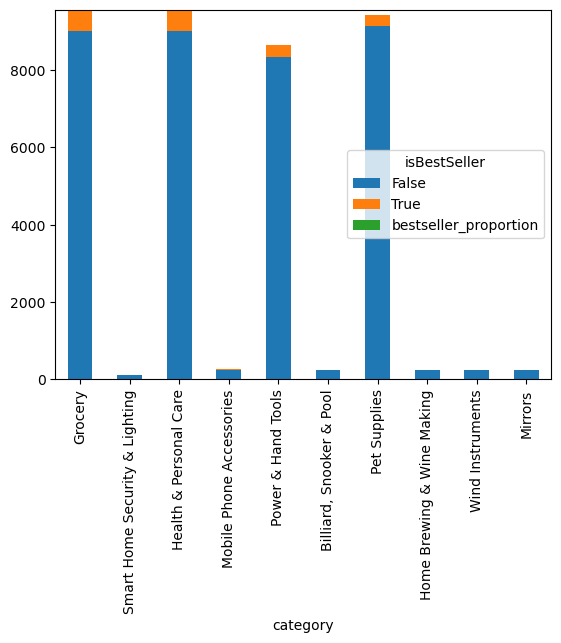

In [11]:
crosstab_sorted.head(10).plot(kind="bar", stacked=True)

plt.show()

In [ ]:
#2
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df['price'][(df['price']<lower_bound) | (df['price']>upper_bound)]

outliers

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [13]:
top20_categories = df['category'].value_counts()[0:20]
top20_categories.index

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances', 'Handmade Gifts',
       'Handmade Home Décor', 'Luggage and travel gear', 'Handmade Jewellery',
       'Handmade Artwork', 'Women', 'Handmade Home & Kitchen Products',
       'Handmade Kitchen & Dining', 'Men', 'Baby'],
      dtype='object', name='category')

In [14]:
no_outliers = df[(df['price']>=lower_bound) & (df['price']<=upper_bound)]
no_outliers = df[(df['category'].isin(top20_categories.index))]

In [15]:
no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


/var/folders/h0/4jpjr28x5yj6tn2nqwlp8cn40000gn/T/ipykernel_38314/4164057392.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=no_outliers, x='price', y='category', palette='coolwarm', inner="quartile")


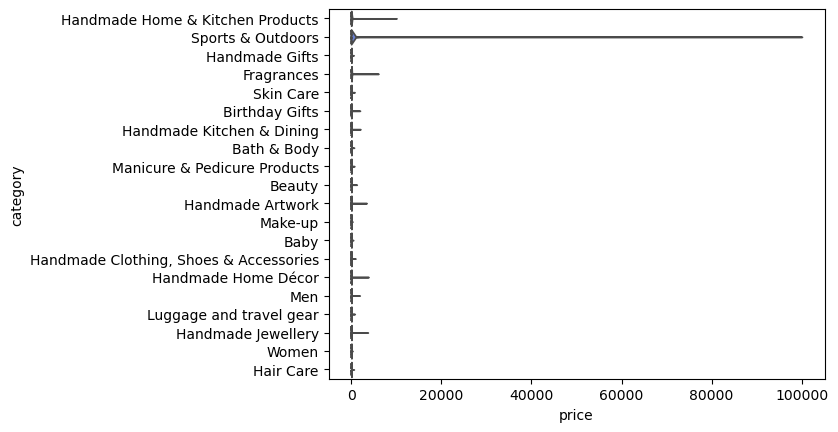

In [16]:
sns.violinplot(data=no_outliers, x='price', y='category', palette='coolwarm', inner="quartile")
plt.show()

In [17]:
top20_categories = df['category'].value_counts()[0:10]
no_outliers = df[(df['category'].isin(top20_categories.index))]

/var/folders/h0/4jpjr28x5yj6tn2nqwlp8cn40000gn/T/ipykernel_38314/623356945.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = no_outliers, x="price", y="category", palette = "coolwarm", errorbar=None, estimator= "mean")


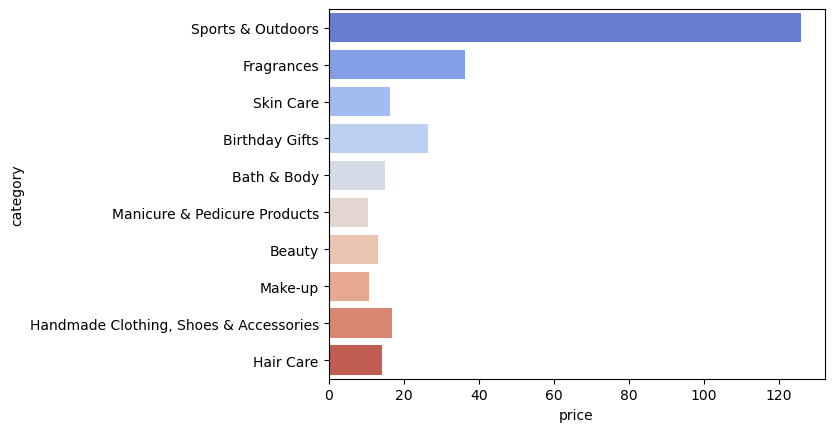

In [18]:
sns.barplot(data = no_outliers, x="price", y="category", palette = "coolwarm", errorbar=None, estimator= "mean")
plt.show()

In [19]:
highest_avg_price = df.groupby('category', as_index=False)['price'].mean()
highest_avg_price = highest_avg_price.sort_values(by='price', ascending=False)
highest_avg_price

,category,price
165,Laptops,1087.987827
0,3D Printers,1018.036129
75,Desktop PCs,926.816064
141,Home Office Furniture,622.135898
278,Test & Measurement,559.382973
...,...,...
22,Bedding Accessories,8.835220
4,Adapters,8.750197
246,Signs & Plaques,8.275136
8,Arts & Crafts,8.182523


In [20]:
top10_categories = pd.DataFrame(df['category'].value_counts()[0:10])
top10_categories

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
Manicure & Pedicure Products,18940
Skin Care,18769
Make-up,18756
Hair Care,18735


In [24]:
no_outliers = df[(df['category'].isin(top10_categories.index))]

In [25]:
no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


/var/folders/h0/4jpjr28x5yj6tn2nqwlp8cn40000gn/T/ipykernel_38314/2222630715.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = no_outliers, x="stars", y="category", palette = "coolwarm")


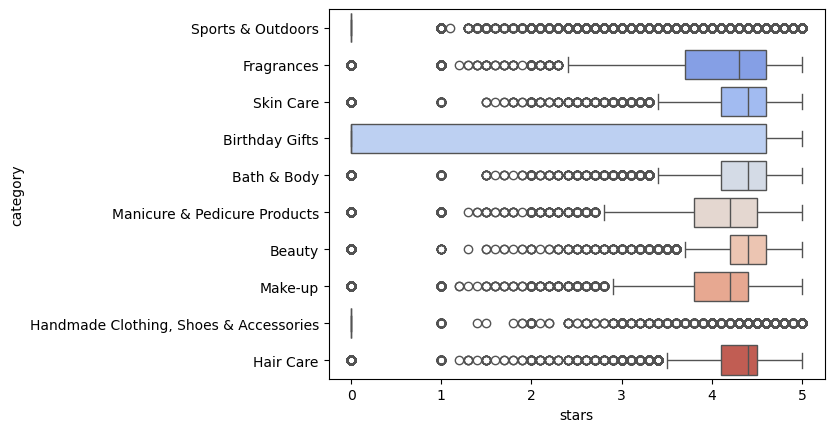

In [28]:
sns.boxplot(data = no_outliers, x="stars", y="category", palette = "coolwarm")
plt.show()

In [41]:
no_outliers[['stars', 'category']]

,stars,category
82163,4.2,Sports & Outdoors
82164,4.2,Sports & Outdoors
82165,4.5,Sports & Outdoors
82166,4.4,Sports & Outdoors
82167,4.5,Sports & Outdoors
...,...,...
2429088,0.0,Sports & Outdoors
2429089,0.0,Sports & Outdoors
2429090,4.3,Sports & Outdoors
2437153,4.2,Sports & Outdoors


In [50]:
groupped = df.groupby('category')['stars'].median()
groupped.sort_values(ascending=False)

category
Computer Memory                4.7
Hobbies                        4.6
Beer, Wine & Spirits           4.6
Laptop Accessories             4.6
Kids' Play Figures             4.6
                              ... 
KVM Switches                   0.0
Karaoke Equipment              0.0
Lab & Scientific Products      0.0
Laptops                        0.0
eBook Readers & Accessories    0.0
Name: stars, Length: 296, dtype: float64

In [ ]:
#3.1
df['price'].corr(df['stars'])
#magnitude closer to 0 means a weaker relationship

-0.1249067326214869

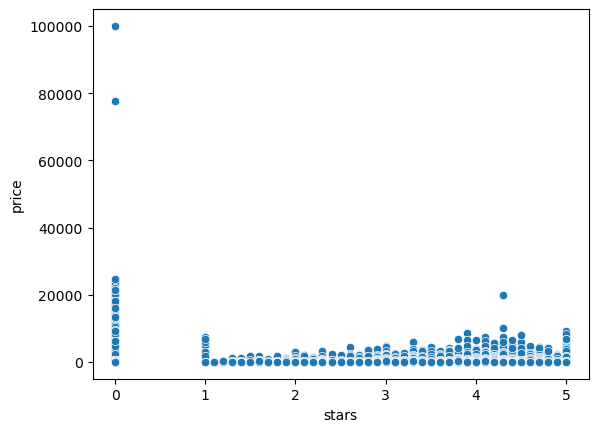

In [53]:
#3.2
sns.scatterplot(data = df, x='stars', y='price')
plt.show()

In [ ]:
#observations: there are many products with 0 stars, they vary from the lowest until the highest prices,
#most of the products that are reviewd by customers are products that cost below 10k usd
#there is no significantly noticeable correlation between stars and price what confirms the result of magnitude -0.12

In [61]:
potencial_categorical = df.select_dtypes('number').loc[:,df.select_dtypes('number').nunique() < 20]
df_categorical = pd.concat([df.select_dtypes('object'), potencial_categorical], axis=1)

df_categorical

,asin,title,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,Hi-Fi Speakers
...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,Motorbike Clothing


In [62]:
df_numerical = df.select_dtypes('number').drop(columns= potencial_categorical.columns)
display(df_numerical.head())

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0


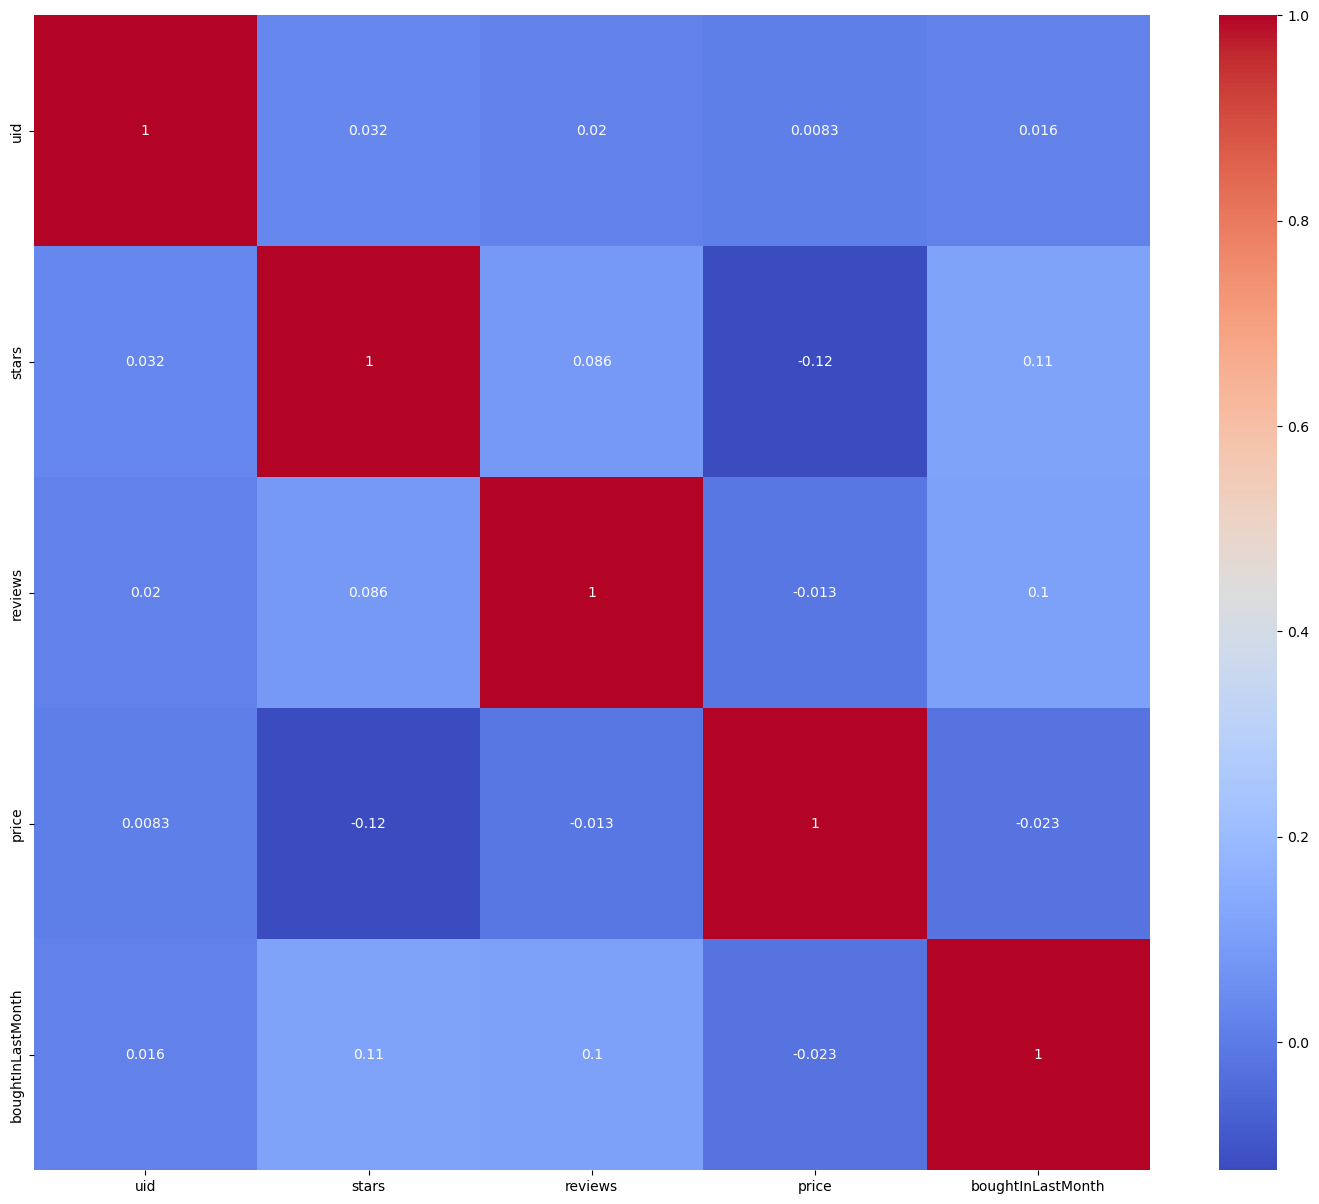

In [63]:
corr_matrix = df_numerical.corr()

plt.figure(figsize = (18,15))

sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.show()

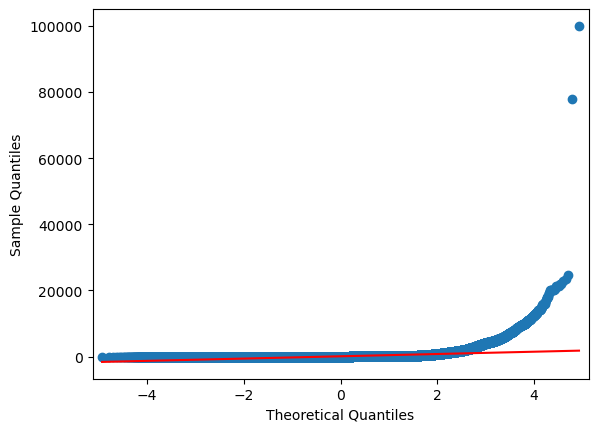

In [66]:
import statsmodels.api as sm

sm.qqplot(df["price"], line = "s")
plt.show()

In [ ]:
#as we can see at the graph it is positively skewed, so it's not a normal distribution, there are some outliers with extremly high prices